# Credit Card Fraud Detection System
* Task:Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.
* The dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
#we want our graphs to be inside the notebook so for that we use
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#load the test and dataset
train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Some exploratory data analysis 

In [4]:
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [5]:
train_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<Axes: >

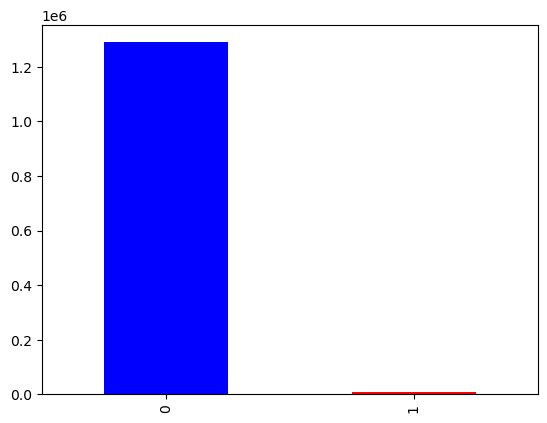

In [6]:
train_data['is_fraud'].value_counts().plot(kind="bar",color=["blue","red"])

In [13]:
pd.crosstab(train_data['is_fraud'],train_data['gender'])

gender,F,M
is_fraud,,
0,706128,583041
1,3735,3771


In [9]:
pd.crosstab(train_data['is_fraud'],train_data['merchant'])

merchant,fraud_Abbott-Rogahn,fraud_Abbott-Steuber,fraud_Abernathy and Sons,fraud_Abshire PLC,"fraud_Adams, Kovacek and Kuhlman",fraud_Adams-Barrows,"fraud_Altenwerth, Cartwright and Koss",fraud_Altenwerth-Kilback,fraud_Ankunding LLC,fraud_Ankunding-Carroll,...,"fraud_Yost, Schamberger and Windler",fraud_Yost-Rogahn,fraud_Zboncak LLC,fraud_Zboncak Ltd,"fraud_Zboncak, Rowe and Murazik",fraud_Zemlak Group,"fraud_Zemlak, Tillman and Cremin",fraud_Ziemann-Waters,"fraud_Zieme, Bode and Dooley",fraud_Zulauf LLC
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,1841,1757,1747,1886,936,1745,1878,2495,1893,817,...,2352,1865,1763,1867,1986,1280,1802,1689,2552,1781
1,3,6,4,9,4,1,26,8,30,4,...,6,7,3,3,31,17,2,6,8,2


In [10]:
pd.crosstab(train_data['is_fraud'],train_data['category'])

category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
is_fraud,,,,,,,,,,,,,,
0,93781,91310,131041,45318,121895,85746,122917,112796,62372,79405,90538,95830,115829,40391
1,233,151,618,134,1743,133,198,239,915,250,220,1713,843,116


C:\Users\DELL\AppData\Local\Temp\ipykernel_25356\2588951767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=train_data.corr()


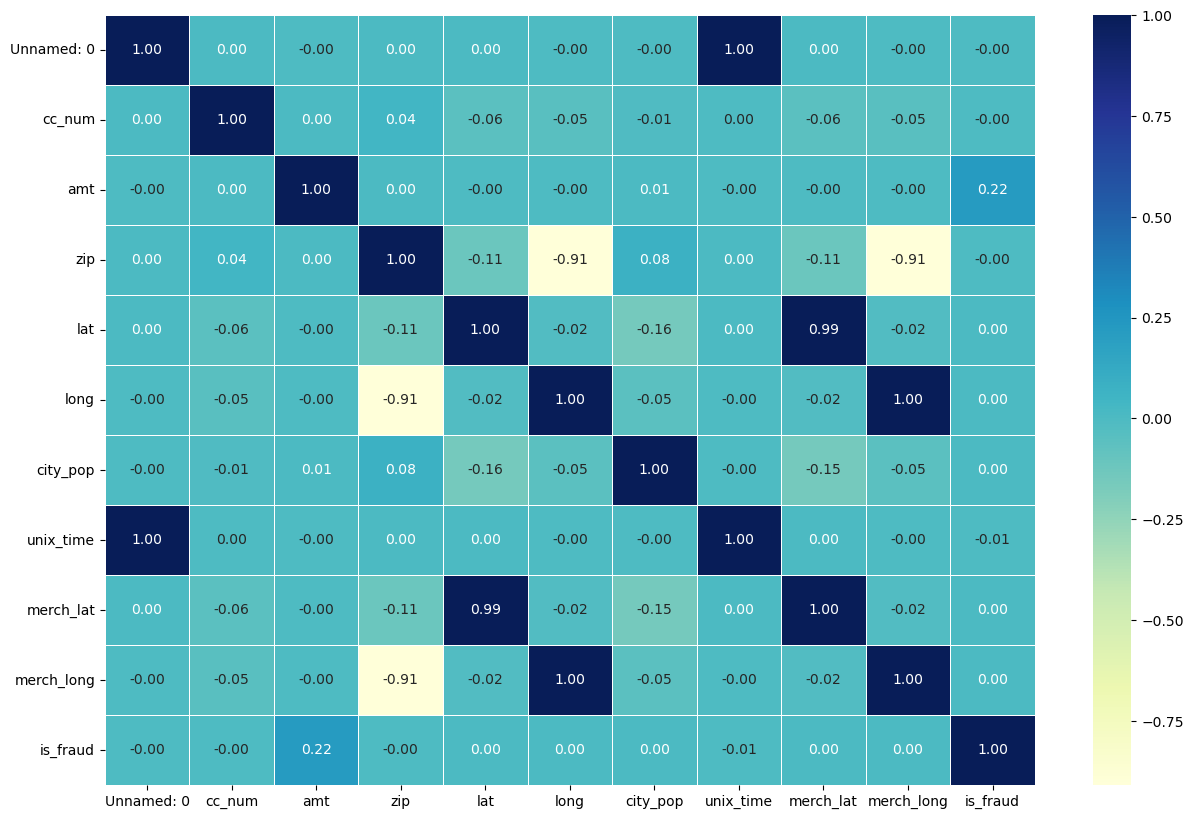

In [14]:
corr_mat=train_data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [15]:
# Preprocess the data
def preprocess_data(data):
    # Convert date/time columns to datetime objects
    data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
   

    # Drop unnecessary columns
    data = data.drop(['trans_date_trans_time','trans_num','first','last', 'unix_time','cc_num','dob','merch_lat','merch_long' ], axis=1)

    # Convert categorical variables to numerical using one-hot encoding
    categorical_columns = ['merchant','category', 'gender','job','street','state','city']
    data_encoded = pd.get_dummies(data, columns=categorical_columns)

    return data_encoded

In [17]:
# Preprocess the training and testing data
train_data_encoded = preprocess_data(train_data)
test_data_encoded = preprocess_data(test_data)

In [18]:
X=train_data_encoded.drop("is_fraud",axis=1)
y=train_data_encoded["is_fraud"]
X_test = test_data_encoded.drop('is_fraud', axis=1)
y_test = test_data_encoded['is_fraud']

In [21]:
# Standardize the input features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_test_scaled = scaler.transform(X_test)
#splitting the data into test and train set
# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
# Initialize and train the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(oob_score=True)

logreg.fit(X_train,y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [23]:
 # Make predictions on the validation set
lr_val_pred = logreg.predict(X_val)
dt_val_pred = dt.predict(X_val)
rf_val_pred = rf.predict(X_val)

In [25]:
# Evaluate the model
print("logreg accuracy =", accuracy_score(y_val, lr_val_pred))
print("Decision tree accuracy =", accuracy_score(y_val, dt_val_pred))
print("Random Forest accuracy =", accuracy_score(y_val, rf_val_pred))

logreg accuracy = 0.8231768231768232
Decision tree accuracy = 0.9560439560439561
Random Forest accuracy = 0.9387279387279387


In [41]:
# Get the common columns between X and X_test
common_columns = X.columns.intersection(X_test.columns)

# Reindex X_test to match the column order of X
X_test_aligned = X_test.reindex(columns=X.columns, fill_value=0)
# Make predictions on the test set
dt_predictions = dt.predict(X_test_aligned)
#As the best out of them is Random Forest therefore
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)


In [43]:
# Print final evaluation metrics on the test dataset
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)
print("Classification report")
print(classification_report(y_test, dt_predictions))
print('Accuracy: ', accuracy_score(y_test, dt_predictions))

Decision Tree:
Accuracy: 0.9549466546941889
Precision: 0.07443486020226056
Recall: 0.9333333333333333
F1-Score: 0.13787404015013255
Classification report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.93      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.94      0.56    555719
weighted avg       1.00      0.95      0.97    555719

Accuracy:  0.9549466546941889
